<a href="https://colab.research.google.com/github/mdapoy/Machine_Learning_S6/blob/main/week1_Automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#WEEK I

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import mglearn

In [22]:
df = pd.read_csv("sample_data/Automobile.csv")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-null    float64
 14  width              205 non-null    float64
 15  length             205 non-null    float64
 16  wheel-base         205 non

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,engine-size,num-of-cylinders,curb-weight,height,width,length,wheel-base,num-of-doors,normalized-losses,symboling
count,201.000000,205.000000,205.000000,203.000000,203.000000,205.000000,201.000000,201.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,203.000000,164.000000,205.000000
mean,13207.129353,30.751220,25.219512,5125.369458,104.256158,10.142537,3.255423,3.329751,126.907317,4.380488,2555.565854,53.724878,65.907805,174.049268,98.756585,3.123153,122.000000,0.834146
std,7947.066342,6.886443,6.542142,479.334560,39.714369,3.972040,0.316717,0.273539,41.642693,1.080854,520.680204,2.443522,2.145204,12.337289,6.021776,0.994841,35.442168,1.245307
min,5118.000000,16.000000,13.000000,4150.000000,48.000000,7.000000,2.070000,2.540000,61.000000,2.000000,1488.000000,47.800000,60.300000,141.100000,86.600000,2.000000,65.000000,-2.000000
25%,7775.000000,25.000000,19.000000,4800.000000,70.000000,8.600000,3.110000,3.150000,97.000000,4.000000,2145.000000,52.000000,64.100000,166.300000,94.500000,2.000000,94.000000,0.000000
50%,10295.000000,30.000000,24.000000,5200.000000,95.000000,9.000000,3.290000,3.310000,120.000000,4.000000,2414.000000,54.100000,65.500000,173.200000,97.000000,4.000000,115.000000,1.000000
75%,16500.000000,34.000000,30.000000,5500.000000,116.000000,9.400000,3.410000,3.590000,141.000000,4.000000,2935.000000,55.500000,66.900000,183.100000,102.400000,4.000000,150.000000,2.000000
max,45400.000000,54.000000,49.000000,6600.000000,288.000000,23.000000,4.170000,3.940000,326.000000,12.000000,4066.000000,59.800000,72.300000,208.100000,120.900000,4.000000,256.000000,3.000000


In [23]:
# Menghapus baris dengan target (symboling) yang hilang (jika ada)
df = df.dropna(subset=['symboling'])


In [24]:
# Memisahkan fitur dan target
X = df.drop(columns=['symboling'])  # Semua fitur kecuali target
y = df['symboling']                 # Target variabel

In [25]:
# Mengisi nilai numerik yang hilang dengan median
for col in X.select_dtypes(include=['float64', 'int64']).columns:
    X[col] = X[col].fillna(X[col].median())

In [26]:
# Mengisi nilai kategorikal yang hilang dengan modus
for col in X.select_dtypes(include=['object']).columns:
    X[col] = X[col].fillna(X[col].mode()[0])

In [27]:
# Mendefinisikan transformer untuk numerik dan kategorikal
num_features = X.select_dtypes(include=['float64', 'int64']).columns
cat_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [28]:
# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat pipeline dengan Ridge Regression
ridge_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

In [29]:
# Melatih model
ridge_model.fit(X_train, y_train)

# Memprediksi
y_pred = ridge_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("rmse: ",rmse)

print("mse: ",mse)

print("r2: ",r2)



rmse:  0.7511303445381621
mse:  0.5641967944860181
r2:  0.6150913914241085


#**PENJELASAN**

1. RMSE (Root Mean Squared Error)

*   RMSE adalah akar dari rata-rata kuadrat kesalahan. ini adadalah metrik yang digunakan untuk mengukur seberapa jauh prediksi model dibandingkan dengan nilai sebenarnya. berikut merupakan rumus RMSE.
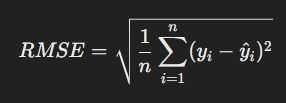

*   diket: n = jumlah data, yi = nilai sebenarnya, dan vektor yi = nilai prediksi

*   interpretasi: RMSE memberikan nilai satuan yang sama dengan data asli dan Semakin kecil nilai RMSE, semakin baik juga modelnya karena kesalahan prediksi lebih kecil.

2.   MSE (Mean Squared Error)

*   MSE adalah rata-rata dari kuadrat kesalahan antara nilai prediksi dan nilai sebenarnya.
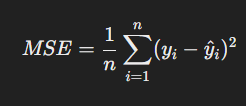

3. R^2

*   R^2 adalah ukuran seberapa baik model regresi dapat menjelaskan variabilitas dalam data.
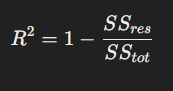
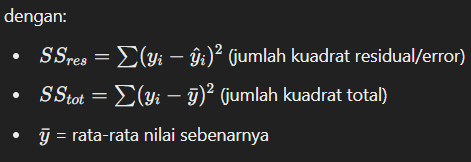
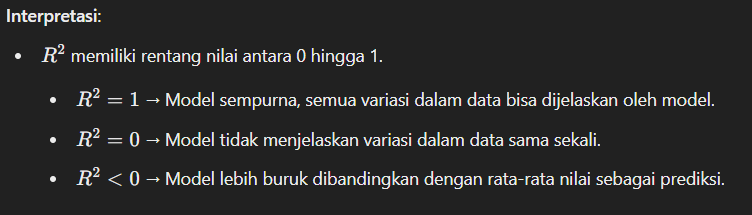








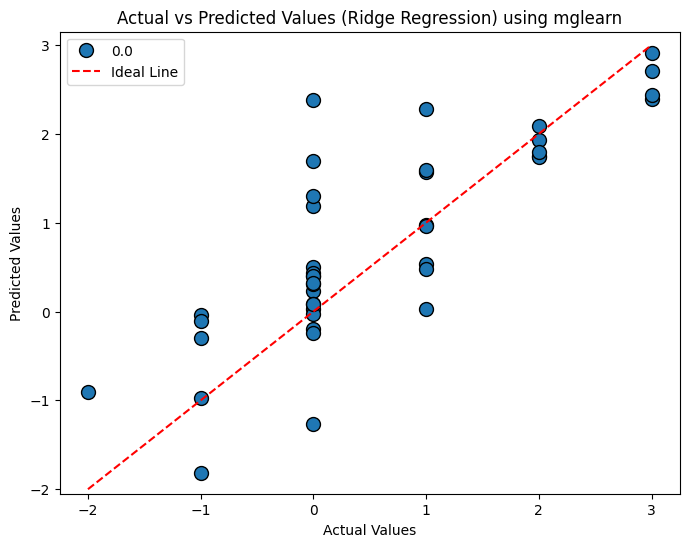

In [30]:
plt.figure(figsize=(8, 6))
mglearn.discrete_scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r', label="Ideal Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Ridge Regression) using mglearn")
plt.legend()
plt.show()